In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
import pandas as pd
df = pd.read_csv('O3D.csv')

In [3]:
df.head()

,Unnamed: 0,City,Date,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,Xylene
0,10229,Delhi,2015-01-01,69.16,36.39,110.59,15.20,9.25,41.68,14.36,24.86,9.84
1,10230,Delhi,2015-01-02,62.09,32.87,88.14,9.54,6.65,29.97,10.55,20.09,4.29
2,10231,Delhi,2015-01-03,25.73,30.31,47.95,10.61,2.65,19.71,3.91,10.23,1.99
3,10232,Delhi,2015-01-04,25.01,36.91,48.62,11.54,4.63,25.36,4.26,9.71,3.34
4,10233,Delhi,2015-01-05,14.01,34.92,38.25,9.20,3.33,23.20,2.80,6.21,2.96


In [4]:
df.dropna(subset = ["O3"], inplace=True)
df.dropna(subset = ["SO2"], inplace=True)

In [5]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.O3.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.374806
p-value: 0.011848


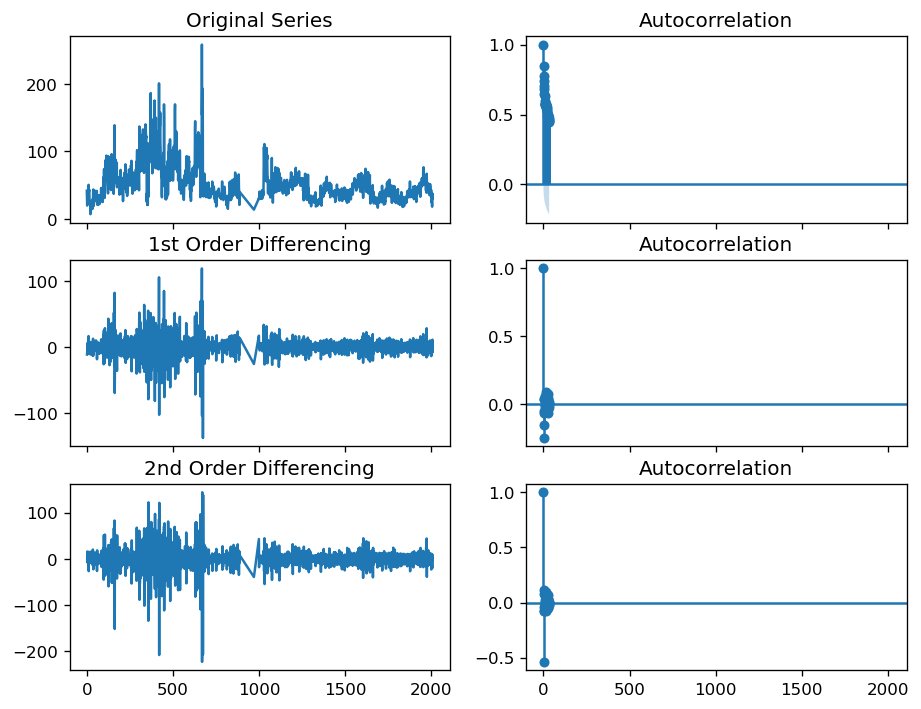

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.O3); axes[0, 0].set_title('Original Series')
plot_acf(df.O3, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.O3.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.O3.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.O3.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.O3.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

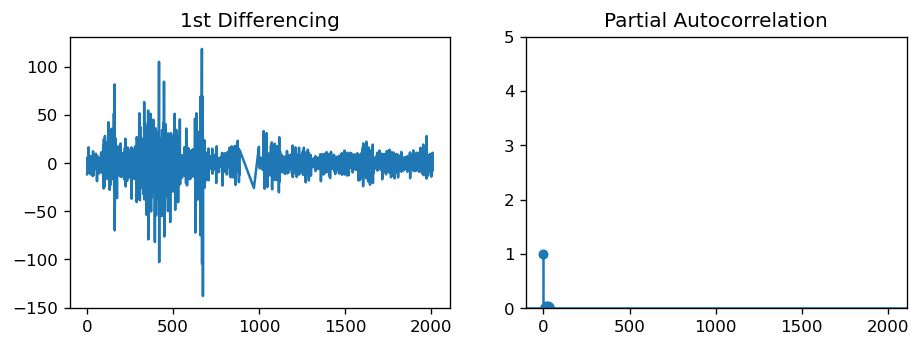

In [7]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.O3.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.O3.diff().dropna(), ax=axes[1])

plt.show()

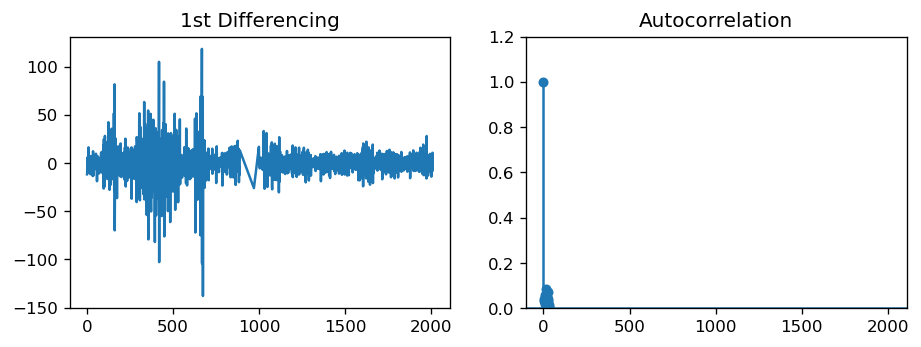

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.O3.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.O3.diff().dropna(), ax=axes[1])

plt.show()

In [9]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.O3, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored wh

                             ARIMA Model Results                              
Dep. Variable:                   D.O3   No. Observations:                 1898
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -7593.340
Method:                       css-mle   S.D. of innovations             13.218
Date:                Thu, 09 Dec 2021   AIC                          15196.680
Time:                        22:06:38   BIC                          15224.423
Sample:                             1   HQIC                         15206.894
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.063      0.033      0.974      -0.122       0.126
ar.L1.D.O3     0.7008      0.057     12.397      0.000       0.590       0.812
ma.L1.D.O3    -1.0906      0.069    -15.909      0.0

In [10]:
model = ARIMA(df.O3, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored wh

                             ARIMA Model Results                              
Dep. Variable:                   D.O3   No. Observations:                 1898
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7596.953
Method:                       css-mle   S.D. of innovations             13.244
Date:                Thu, 09 Dec 2021   AIC                          15201.907
Time:                        22:06:39   BIC                          15224.101
Sample:                             1   HQIC                         15210.078
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.675e-05      0.077     -0.001      0.999      -0.150       0.150
ar.L1.D.O3     0.5312      0.035     15.217      0.000       0.463       0.600
ma.L1.D.O3    -0.8822      0.021    -41.052      0.0

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


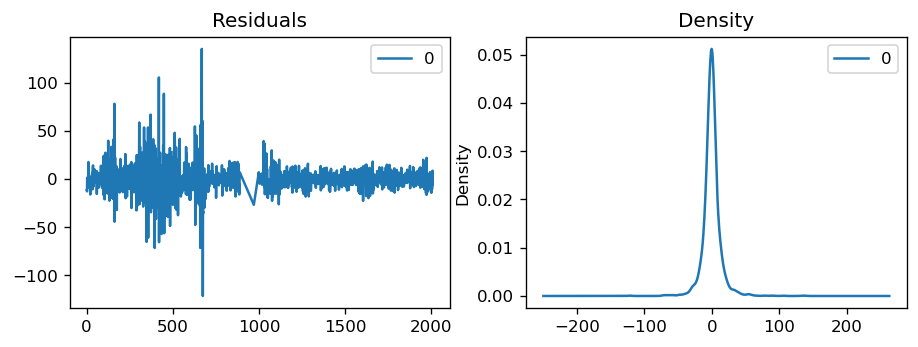

In [11]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

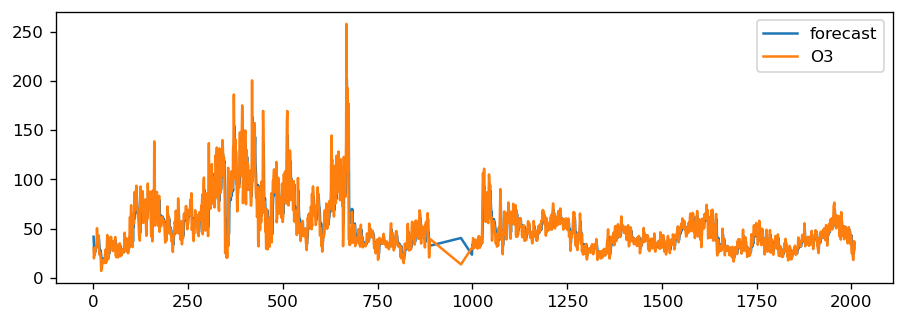

In [12]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [13]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.O3[:1005]
test = df.O3[1005:]

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored wh

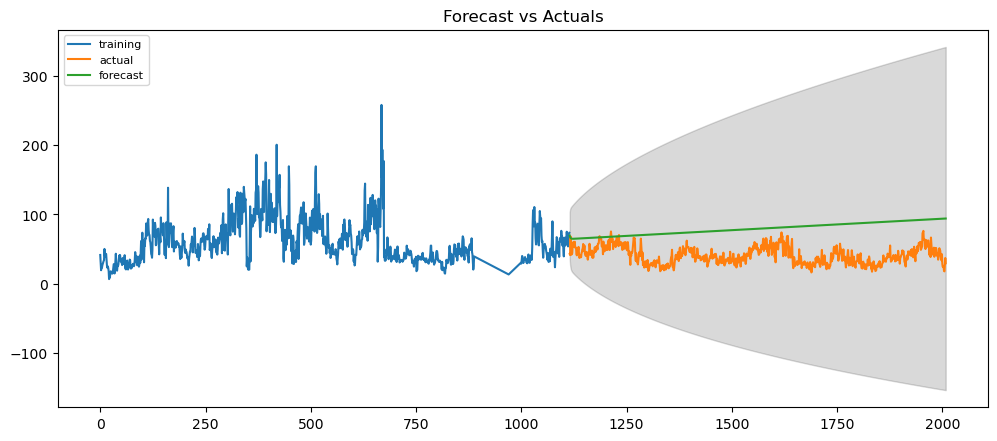

In [14]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(894, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and 

                             ARIMA Model Results                              
Dep. Variable:                  D2.O3   No. Observations:                 1003
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -4297.153
Method:                       css-mle   S.D. of innovations             17.485
Date:                Thu, 09 Dec 2021   AIC                           8606.305
Time:                        22:06:42   BIC                           8635.770
Sample:                             2   HQIC                          8617.502
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.483e-05      0.001     -0.083      0.934      -0.002       0.002
ar.L1.D2.O3    -0.3293      0.031    -10.457      0.000      -0.391      -0.268
ar.L2.D2.O3    -0.2552      0.032     -7.934    

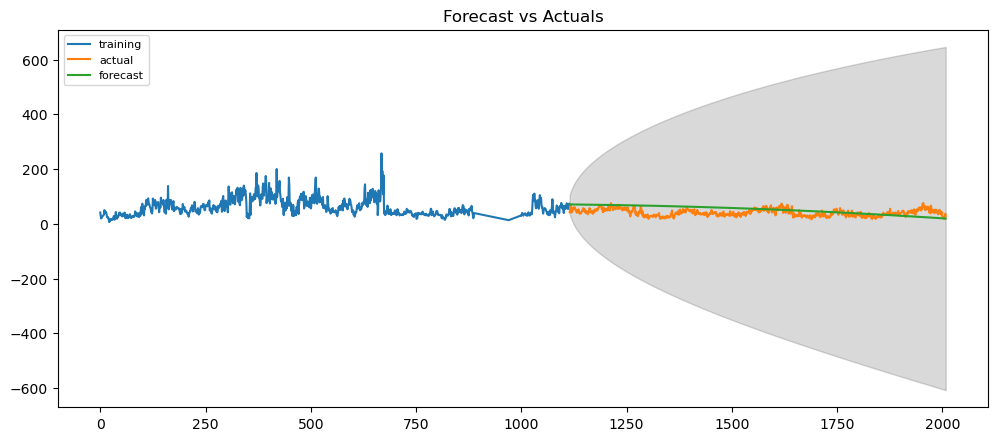

In [15]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(894, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [16]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 0.5017237901689265,
 'me': 10.605813385681275,
 'mae': 17.58155535495277,
 'mpe': 0.36261294471349903,
 'rmse': 20.843834140357327,
 'acf1': 0.9280703113465103,
 'corr': 0.1482360597041294,
 'minmax': 0.31007602682132174}

In [17]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(df.O3, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=15291.600, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20804.282, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=15479.358, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18781.346, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=15210.372, Time=1.21 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=15370.269, Time=0.38 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=15208.742, Time=1.20 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=15274.628, Time=0.57 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=15196.281, Time=1.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=15205.691, Time=1.67 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=15174.531, Time=2.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=15217.762, Time=1.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=15169.752, Time=6.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=15190.136, Time=2.97 sec
 ARIMA(3,0,2)(0,0,0

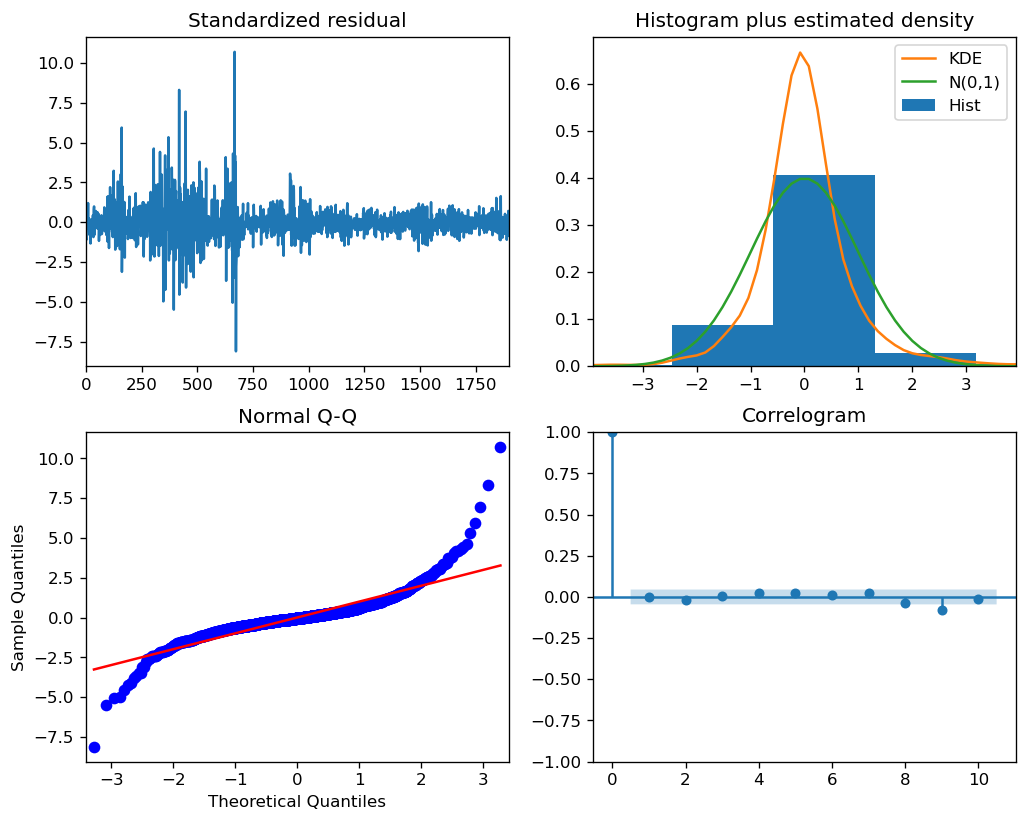

In [18]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

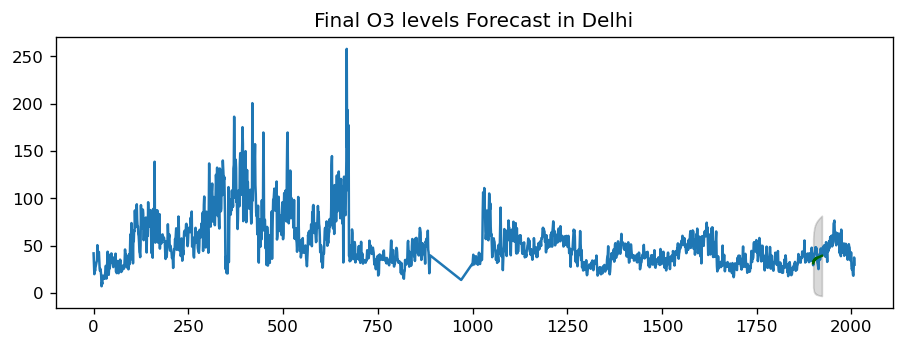

In [19]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.O3), len(df.O3)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.O3)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final O3 levels Forecast in Delhi")
plt.show()

In [20]:
#ARIMA to predict SO2 levels
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.SO2.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.291359
p-value: 0.000460


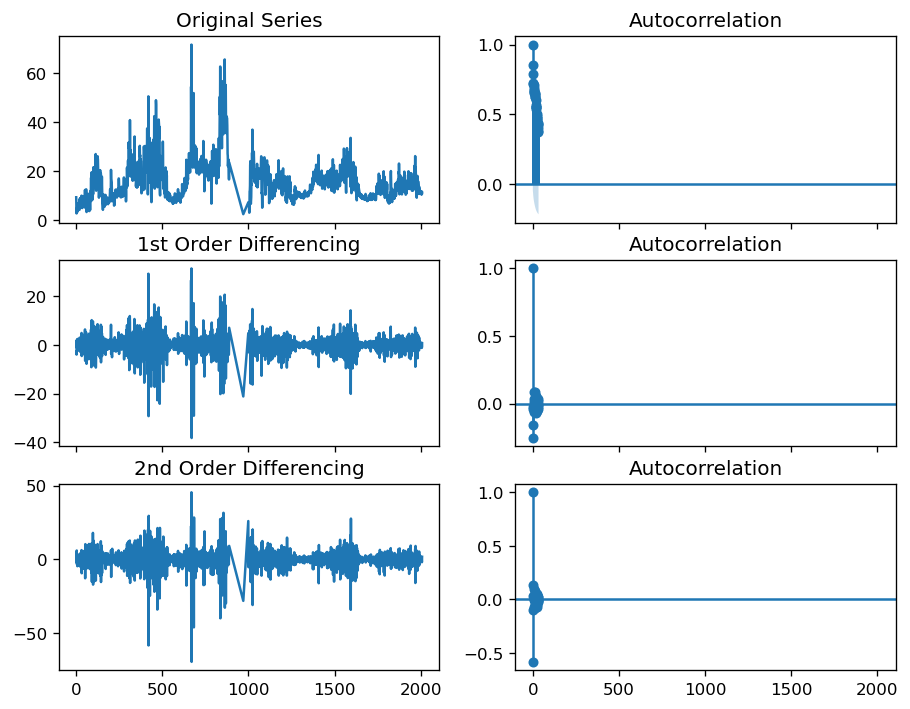

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.SO2); axes[0, 0].set_title('Original Series')
plot_acf(df.SO2, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.SO2.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.SO2.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.SO2.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.SO2.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

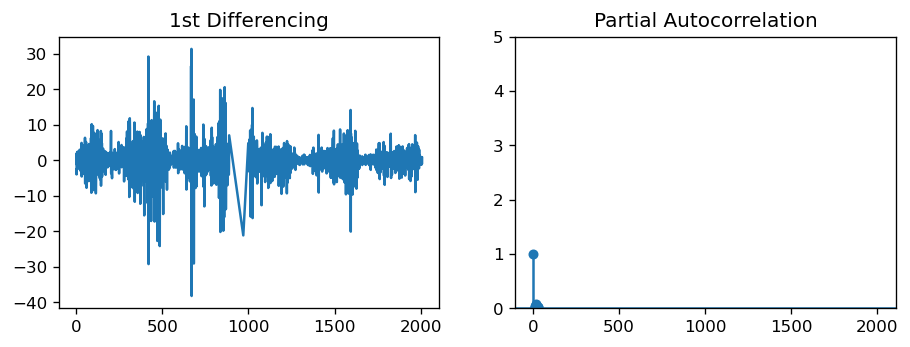

In [22]:

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.SO2.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.SO2.diff().dropna(), ax=axes[1])

plt.show()

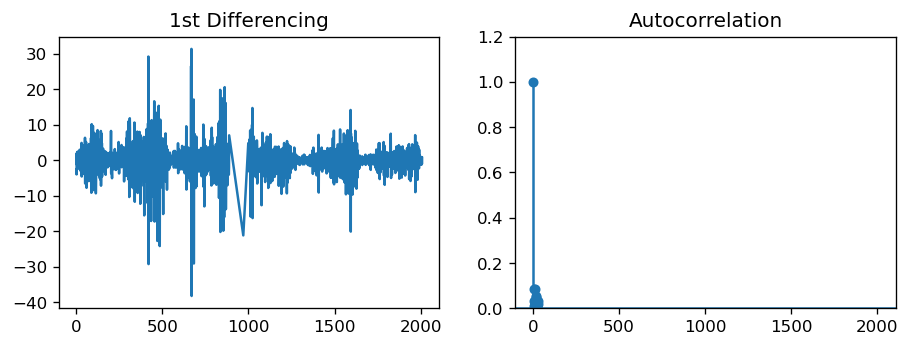

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.SO2.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.SO2.diff().dropna(), ax=axes[1])

plt.show()

In [24]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.SO2, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored wh

                             ARIMA Model Results                              
Dep. Variable:                  D.SO2   No. Observations:                 1898
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -5282.274
Method:                       css-mle   S.D. of innovations              3.912
Date:                Thu, 09 Dec 2021   AIC                          10574.547
Time:                        22:07:37   BIC                          10602.290
Sample:                             1   HQIC                         10584.761
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0028      0.025      0.111      0.912      -0.046       0.052
ar.L1.D.SO2     0.4965      0.054      9.236      0.000       0.391       0.602
ma.L1.D.SO2    -0.8795      0.056    -15.809    

In [25]:
model = ARIMA(df.SO2, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored wh

                             ARIMA Model Results                              
Dep. Variable:                  D.SO2   No. Observations:                 1898
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5282.403
Method:                       css-mle   S.D. of innovations              3.912
Date:                Thu, 09 Dec 2021   AIC                          10572.806
Time:                        22:07:38   BIC                          10595.001
Sample:                             1   HQIC                         10580.977
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0028      0.025      0.110      0.912      -0.047       0.052
ar.L1.D.SO2     0.4734      0.030     15.668      0.000       0.414       0.533
ma.L1.D.SO2    -0.8525      0.017    -49.363    

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


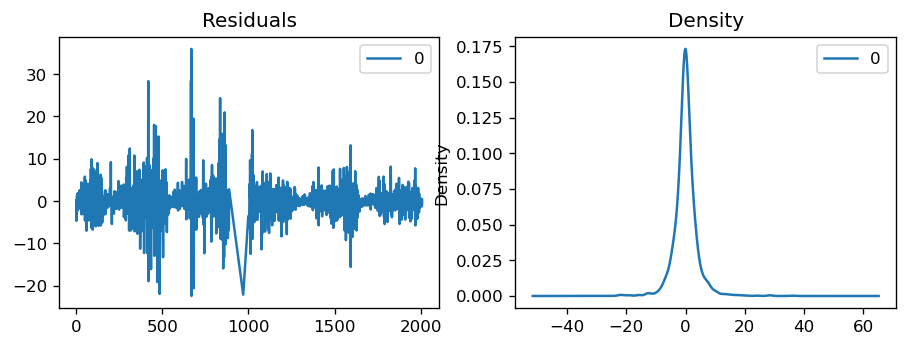

In [26]:

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

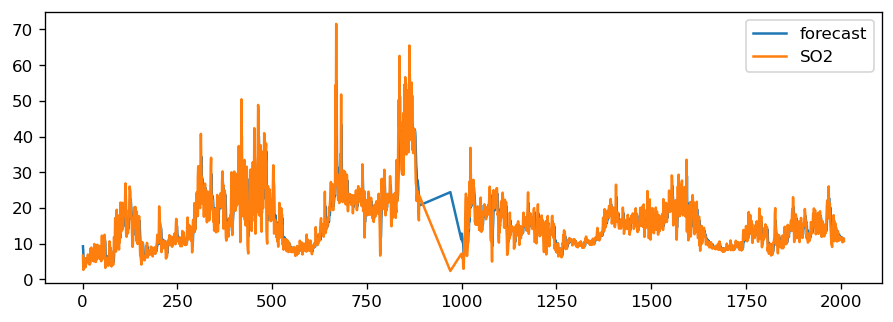

In [27]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [28]:
from statsmodels.tsa.stattools import acf
# Create Training and Test
train = df.SO2[:1005]
test = df.SO2[1005:]

C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored wh

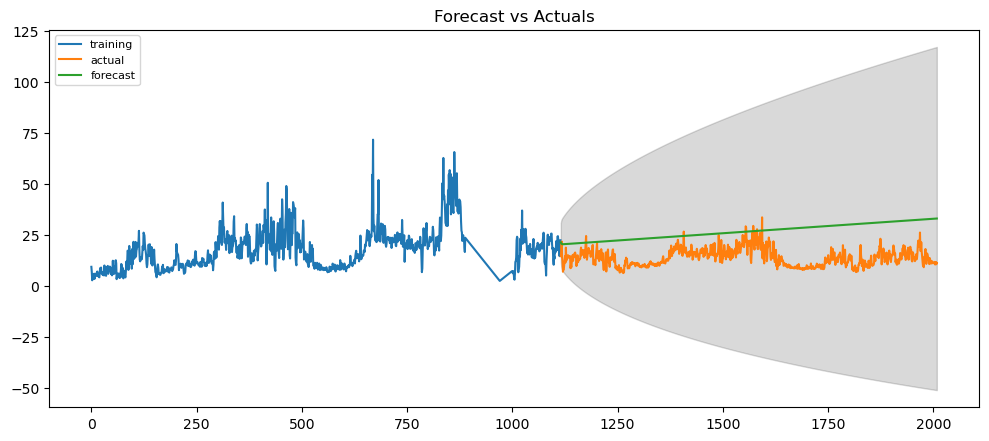

In [29]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(894, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [30]:

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)



C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Nathamayil\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'mape': 1.114247845787641,
 'me': 12.821727683279601,
 'mae': 12.869225642265702,
 'mpe': 1.1125815319295491,
 'rmse': 14.007413509950863,
 'acf1': 0.8869826268830502,
 'corr': -0.030206132345042838,
 'minmax': 0.4736962102199761}

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.SO2, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10706.753, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16323.000, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10871.521, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=14425.547, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10578.672, Time=0.81 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=10757.095, Time=0.31 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=10580.323, Time=1.18 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=10580.434, Time=1.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=10630.679, Time=0.70 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=10737.391, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10568.688, Time=2.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10661.453, Time=0.81 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10685.405, Time=0.64 sec
 ARIMA(3,0,1)(0,0,0)[0] i

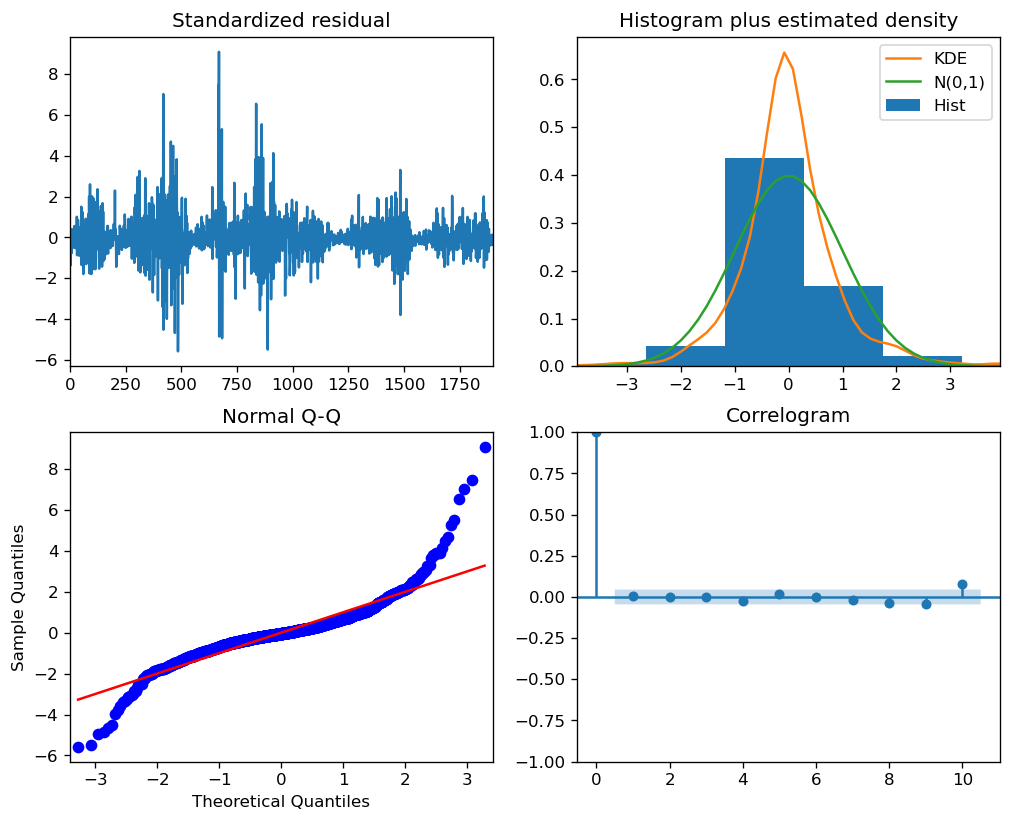

In [32]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

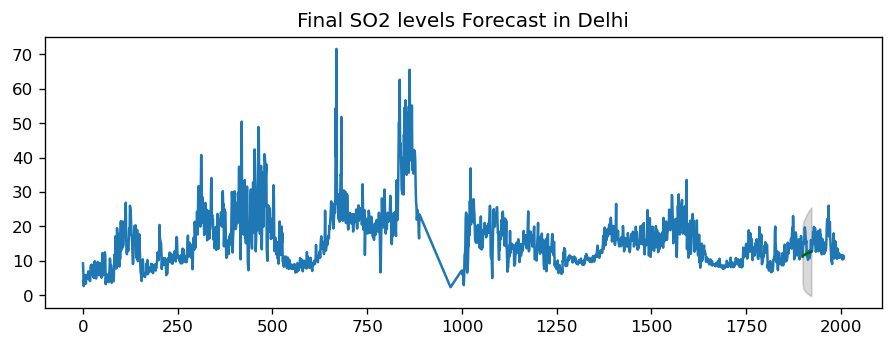

In [35]:
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.SO2), len(df.SO2)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.SO2)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final SO2 levels Forecast in Delhi")
plt.show()